# Read results 

### Load the required libraries

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.pyplot import *
import seaborn as sns
import matplotlib.dates as mdates
#plt.style.use('seaborn-colorblind')
import pickle
import sys
sys.path.append("..")
import dispaset as ds

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
%matplotlib inline

In [4]:
#%matplotlib notebook

In [5]:
#%matplotlib ipympl
#%matplotlib widget

In [6]:
from dispaset.postprocessing import postprocessing as post
import importlib
importlib.reload(post)

<module 'dispaset.postprocessing.postprocessing' from '../dispaset/postprocessing/postprocessing.py'>

In [7]:
pd.options.display.max_rows = 60   #default 60 (None)
pd.options.display.max_columns = 60   #default 60 (None)
np.set_printoptions(threshold=1000)   #default 1000 (np.inf)

### Define the path to the simulation environment

The folder must contain the simulatin inputs (written by the pre-processing tool) as wall as the simulation results (Results.gdx).

In [8]:
path = '../Simulations/Test7' 

### Load the inputs and the results of the simulation

This can be computationally intensive for large simulations:

In [9]:
#This function reads the simulation environment folder once it has been solved and loads
# the input variables together with the results.
inputs,results = ds.get_sim_results(path=path,cache=True)

[WARNING ] (get_gams_path): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /Applications//GAMS26.1/sysdir as GAMS path on this computer


### Format the inputs as a dictionary of dataframes:

In [10]:
#Function that converts the dispaset data format into a dictionary of dataframes
datain = ds.ds_to_df(inputs)

### Select the time period for plotting

In [11]:
rng = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-12-29 23:00:00',freq='h')
rng1 = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-01-31 23:00:00',freq='h')
rng2 = pd.DatetimeIndex(start='2016-02-01 00:00:00',end='2016-02-29 23:00:00',freq='h')
rng3 = pd.DatetimeIndex(start='2016-03-01 00:00:00',end='2016-03-31 23:00:00',freq='h')
rng4 = pd.DatetimeIndex(start='2016-04-01 00:00:00',end='2016-04-30 23:00:00',freq='h')
rng5 = pd.DatetimeIndex(start='2016-05-01 00:00:00',end='2016-05-31 23:00:00',freq='h')
rng6 = pd.DatetimeIndex(start='2016-06-01 00:00:00',end='2016-06-30 23:00:00',freq='h')
rng7 = pd.DatetimeIndex(start='2016-07-01 00:00:00',end='2016-07-31 23:00:00',freq='h')
rng8 = pd.DatetimeIndex(start='2016-08-01 00:00:00',end='2016-08-31 23:00:00',freq='h')
rng9 = pd.DatetimeIndex(start='2016-09-01 00:00:00',end='2016-09-30 23:00:00',freq='h')
rng10 = pd.DatetimeIndex(start='2016-10-01 00:00:00',end='2016-10-31 23:00:00',freq='h')
rng11 = pd.DatetimeIndex(start='2016-11-01 00:00:00',end='2016-11-30 23:00:00',freq='h')
rng12 = pd.DatetimeIndex(start='2016-12-01 00:00:00',end='2016-12-31 23:00:00',freq='h')
rngsummer = pd.DatetimeIndex(start='2016-04-01 00:00:00',end='2016-11-30 23:00:00',freq='h')
rngwinter1 = pd.DatetimeIndex(start='2016-12-01 00:00:00',end='2016-12-31 23:00:00',freq='h')
rngwinter2 = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-03-31 23:00:00',freq='h')
rngwinter = rngwinter1.append(rngwinter2)

In [12]:
rng = pd.DatetimeIndex(start='2016-07-11 00:00:00',end='2016-07-17 23:00:00',freq='h')

## -- General information

In [13]:
#Reads the DispaSET results and provides useful general information to stdout
r = ds.get_result_analysis(inputs,results)

[ERROR   ] (get_result_analysis): Could compute storage data



Average electricity cost : 8.487602187106615 $/MWh

Aggregated statistics for the considered area:
Total consumption:16.855670612999997 TWh
Peak load:110082.816 MW
Net importations:0.0 TWh

Zone-Specific values (in TWh or in MW):
             Demand   PeakLoad  NetImports  LoadShedding  Curtailment
SA_EOA     2.892246  18369.977   -0.349969           NaN          NaN
SA_RIYADH  2.153522  14404.277   -0.078775           NaN     0.000180
SA_QASSIM  0.404388   2695.942    0.389049           NaN          NaN
SA_HAIL    0.157939   1063.890    0.031903           NaN          NaN
SA_WOA     2.341515  15860.248   -0.028802           NaN     0.000179
SA_SOA     0.862762   5711.107   -0.104171           NaN          NaN
SA_NWOA    0.175769   1241.752    0.000000           NaN          NaN
SA_NEOA    0.205584   1403.988    0.133388           NaN          NaN
OM         0.851078   6069.440    0.003614           NaN          NaN
KW         1.935606  13295.540   -0.000041           NaN     0.000287

## -- Demand

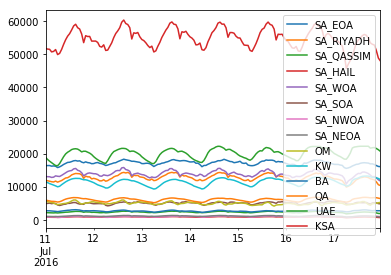

In [14]:
NodeDemand = datain['Demand']['DA']
BBB = pd.DataFrame(NodeDemand[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA_Demand = BBB.sum(axis=1)

NodeDemand['KSA']= pd.Series(KSA_Demand.values, index=NodeDemand.index)
NodeDemand.plot()


In [15]:
A = datain['Demand']['DA'].head(5)
A.drop(['BA','KW','OM','QA','UAE'], axis=1)

,SA_EOA,SA_RIYADH,SA_QASSIM,SA_HAIL,SA_WOA,SA_SOA,SA_NWOA,SA_NEOA
2016-07-11 00:00:00,16432.704,11996.502,2257.921,875.430,13150.131,5001.238,922.267,1128.281
2016-07-11 01:00:00,16432.342,11874.067,2235.692,865.810,13095.599,5040.349,922.238,1114.118
2016-07-11 02:00:00,16463.513,11735.758,2210.589,854.935,13078.505,5123.073,952.886,1098.093
2016-07-11 03:00:00,16270.821,11577.158,2181.673,842.574,12872.213,4957.550,952.856,1080.137
2016-07-11 04:00:00,16338.105,11502.297,2168.042,836.725,12949.203,5072.527,937.853,1071.605


## -- Operation cost

143.06422676004746
143.06422676004746
0.0


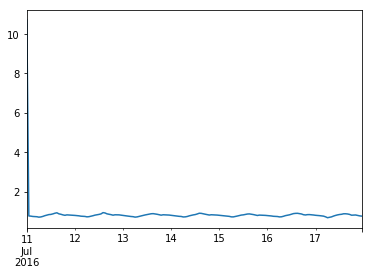

In [16]:
AA = results['TotalSystemCost']*(1/1000000)   #Million
AA.plot()
print (AA.sum())
print (AA['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum())    #Summer
print (AA['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum() + AA['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum())   #Winter


,SA_EOA,SA_RIYADH,SA_QASSIM,SA_HAIL,SA_WOA,SA_SOA,SA_NWOA,SA_NEOA,OM,KW,BA,QA,UAE,KSA
2016-07-11 00:00:00,1.092285,1.388478,0.033564,0.086404,0.948736,0.571755,0.049294,0.075829,0.848641,2.091678,0.370062,1.023777,2.137350,4.246345
2016-07-11 01:00:00,0.131101,0.087570,0.018695,0.007722,0.069346,0.031215,0.003578,0.004323,0.106921,0.056266,0.031080,0.109212,0.099204,0.353551
2016-07-11 02:00:00,0.129367,0.076138,0.018457,0.007626,0.067127,0.042501,0.008473,0.004260,0.104631,0.054818,0.030882,0.107283,0.096357,0.353949
2016-07-11 03:00:00,0.127207,0.084766,0.018208,0.007516,0.064699,0.030929,0.008473,0.004191,0.102227,0.053605,0.030326,0.104808,0.093867,0.345987
2016-07-11 04:00:00,0.127554,0.074451,0.018101,0.007464,0.065117,0.042072,0.008339,0.004158,0.099513,0.052571,0.029766,0.104524,0.091501,0.347255


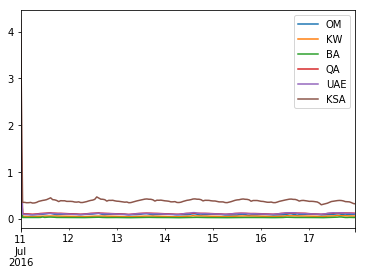

In [17]:
TotalZoneOperationCost = (results['TotalNodeOperationCost']*(1/1000000)).copy()
BBB = pd.DataFrame(TotalZoneOperationCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA = BBB.sum(axis=1)
TotalZoneOperationCost['KSA']= pd.Series(KSA.values, index=TotalZoneOperationCost.index)
TotalZoneOperationCost.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).plot()
TotalZoneOperationCost.head(5)

In [18]:
#/(1000000)
TotalZoneOperationCost = results['TotalNodeOperationCost'].copy()
BBB = pd.DataFrame(TotalZoneOperationCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA = BBB.sum(axis=1)

TotalZoneOperationCost['KSA']= pd.Series(KSA.values, index=TotalZoneOperationCost.index)
TotalZoneOperationCost.head(5)


,SA_EOA,SA_RIYADH,SA_QASSIM,SA_HAIL,SA_WOA,SA_SOA,SA_NWOA,SA_NEOA,OM,KW,BA,QA,UAE,KSA
2016-07-11 00:00:00,1.092285e+06,1.388478e+06,33564.226346,86404.114041,948735.832061,571754.884852,49294.357805,75828.676824,848641.268205,2.091678e+06,370062.352514,1.023777e+06,2.137350e+06,4.246345e+06
2016-07-11 01:00:00,1.311014e+05,8.757025e+04,18695.427975,7722.319626,69346.427829,31214.728249,3578.126522,4322.588274,106921.195542,5.626569e+04,31079.818565,1.092119e+05,9.920353e+04,3.535513e+05
2016-07-11 02:00:00,1.293668e+05,7.613757e+04,18456.844380,7625.617992,67127.417004,42501.337200,8473.161646,4260.414001,104630.503335,5.481754e+04,30882.070433,1.072831e+05,9.635682e+04,3.539492e+05
2016-07-11 03:00:00,1.272070e+05,8.476561e+04,18207.671060,7515.702692,64698.643638,30929.018549,8472.894883,4190.747776,102226.777760,5.360475e+04,30325.711126,1.048081e+05,9.386678e+04,3.459873e+05
2016-07-11 04:00:00,1.275538e+05,7.445124e+04,18101.091754,7463.692774,65116.575649,42071.508739,8339.486643,4157.645068,99513.143709,5.257056e+04,29766.048677,1.045243e+05,9.150057e+04,3.472551e+05


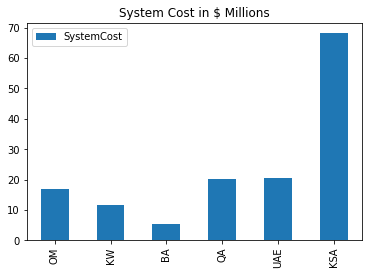

In [19]:
A = pd.Series(((results['TotalNodeOperationCost'].sum())/(1000000)).drop(['BA','KW','OM','QA','UAE']).sum())
A.name = 'KSA'
SystemCost = pd.DataFrame((results['TotalNodeOperationCost'].sum())/(1000000))
SystemCost = SystemCost.append(A, ignore_index=False)
SystemCost.columns = ['SystemCost']
SystemCost

SystemCost.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='System Cost in $ Millions')


In [20]:
#Total output system cost in Millions $ 
SystemCost2 = results['TotalNodeOperationCost'].copy() #/(1000000)
SystemCost2['KSA'] = SystemCost2['SA_EOA']+SystemCost2['SA_HAIL']+SystemCost2['SA_NEOA']+SystemCost2['SA_NWOA']+SystemCost2['SA_QASSIM']+SystemCost2['SA_RIYADH']+SystemCost2['SA_SOA']+SystemCost2['SA_WOA']
SystemCost2.sum()/(1000000)


SA_EOA       23.287237
SA_RIYADH    16.560790
SA_QASSIM     3.205337
SA_HAIL       1.436309
SA_WOA       13.787339
SA_SOA        7.141590
SA_NWOA       1.461618
SA_NEOA       1.312054
OM           17.013418
KW           11.733433
BA            5.532148
QA           20.089500
UAE          20.503452
KSA          68.192275
dtype: float64

## -- Average electricty cost (Electricty price)

In [21]:
#Average electricity cost in $/MWh 
(results['TotalNodeOperationCost']) / datain['Demand']['DA']

#Average electricity cost in $/MWh 
A = pd.Series((datain['Demand']['DA'].sum().drop(['BA','KW','OM','QA','UAE'])).sum())
A.name = 'KSA'
System_demand = pd.DataFrame(datain['Demand']['DA'].sum())
System_demand = System_demand.append(A, ignore_index=False)
System_demand.columns = ['TotalDemand']
elec_cost = pd.Series(SystemCost['SystemCost']*(1000000), index=SystemCost.index)/pd.Series(System_demand['TotalDemand'], index=System_demand.index)
elec_cost

SA_EOA        8.051609
SA_RIYADH     7.690096
SA_QASSIM     7.926382
SA_HAIL       9.094085
SA_WOA        5.888213
SA_SOA        8.277594
SA_NWOA       8.315550
SA_NEOA       6.382085
OM           19.990443
KW            6.061891
BA           11.961164
QA           19.393782
UAE           6.071717
KSA           7.417262
dtype: float64

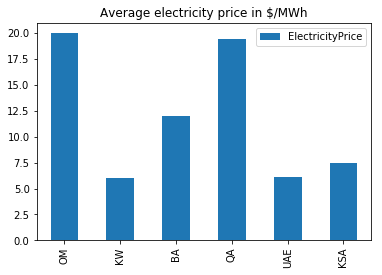

In [22]:
### Finding the sum for demand and cost to plot bar chart
#Average electricity cost in $/MWh 
A = pd.Series((datain['Demand']['DA'].sum().drop(['BA','KW','OM','QA','UAE'])).sum())
A.name = 'KSA'
System_demand = pd.DataFrame(datain['Demand']['DA'].sum())
System_demand = System_demand.append(A, ignore_index=False)
System_demand.columns = ['TotalDemand']
elec_cost = pd.Series(SystemCost['SystemCost']*(1000000), index=SystemCost.index)/pd.Series(System_demand['TotalDemand'], index=System_demand.index)

elec_cost = pd.DataFrame(elec_cost,columns=['ElectricityPrice'])
elec_cost.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='Average electricity price in $/MWh')


In [23]:
#/(1000000)
TotalZoneOperationCost = results['TotalNodeOperationCost'].copy()
BBB = pd.DataFrame(TotalZoneOperationCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA = BBB.sum(axis=1)
TotalZoneOperationCost['KSA']= pd.Series(KSA.values, index=TotalZoneOperationCost.index)

NodeDemand = datain['Demand']['DA']
BBB = pd.DataFrame(NodeDemand[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA_Demand = BBB.sum(axis=1)
NodeDemand['KSA']= pd.Series(KSA_Demand.values, index=NodeDemand.index)

TotalZoneOperationCost.div(NodeDemand).mean()

SA_EOA        8.064700
SA_RIYADH     7.721274
SA_QASSIM     7.902323
SA_HAIL       9.128037
SA_WOA        5.906857
SA_SOA        8.279740
SA_NWOA       8.334800
SA_NEOA       6.290180
OM           19.892013
KW            6.057464
BA           11.929849
QA           19.413566
UAE           6.105654
KSA           7.434870
dtype: float64

Text(0.5, 1.0, 'Daily average electricity prices $/MWh')

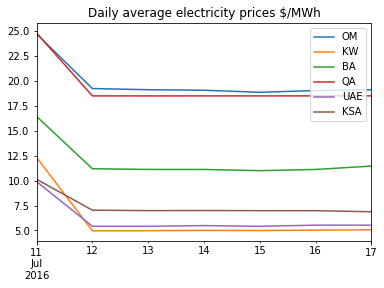

In [24]:
TotalZoneOperationCost = results['TotalNodeOperationCost'].copy()
BBB = pd.DataFrame(TotalZoneOperationCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA = BBB.sum(axis=1)
TotalZoneOperationCost['KSA']= pd.Series(KSA.values, index=TotalZoneOperationCost.index)

NodeDemand = datain['Demand']['DA']
BBB = pd.DataFrame(NodeDemand[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA_Demand = BBB.sum(axis=1)
NodeDemand['KSA']= pd.Series(KSA_Demand.values, index=NodeDemand.index)

ElectrictyPrice=TotalZoneOperationCost.div(NodeDemand)
ElectrictyPrice.resample('D').mean().drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).plot()
plt.title('Daily average electricity prices $/MWh')
###results['NodeShadowPrice'].resample('D',how='mean')


## -- Power flows

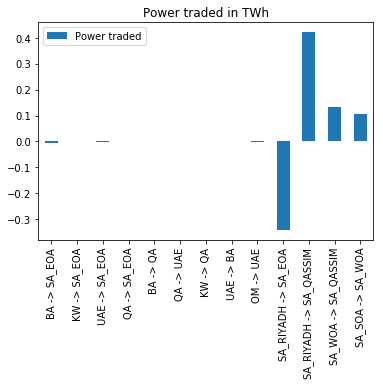

In [47]:
NewOutputFlow = results['PowerFlow'].copy()
OriginalColumns = []
reverseindex = []
for j,column in enumerate(NewOutputFlow):
    A = column.split(' -> ')
    OriginalColumns.append(A)
    B = list(reversed(A))
    if B in OriginalColumns:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow.iloc[:,D] = NewOutputFlow.iloc[:,D] - NewOutputFlow.iloc[:,j]
NewOutputFlow = NewOutputFlow.drop(NewOutputFlow.columns[reverseindex], axis=1).copy()
NewOutputFlow.head(5)

pd.DataFrame((NewOutputFlow.sum()/(1000000)),columns=['Power traded']).drop(['SA_HAIL -> SA_NEOA','SA_QASSIM -> SA_HAIL']).plot.bar(title='Power traded in TWh')
#  ,'SA_RIYADH -> SA_QASSIM','SA_WOA -> SA_SOA', 'SA_EOA -> SA_RIYADH', 'SA_QASSIM -> SA_WOA'

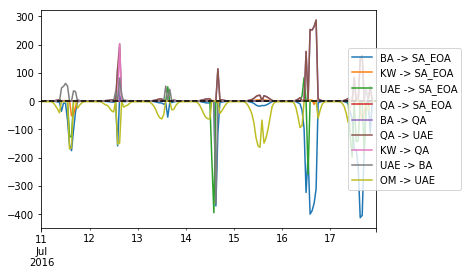

In [26]:
### Drop flows inside KSA and plot line chart
columns = []
for i,column in enumerate(NewOutputFlow):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()
ax = GCCFlows.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')

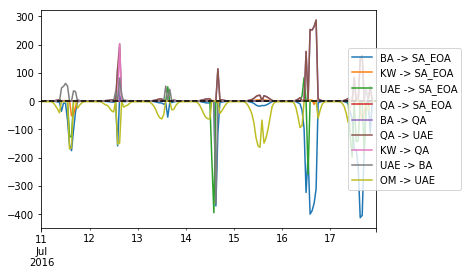

In [27]:
NewOutputFlow = results['PowerFlow'].copy()
OriginalColumns = []
reverseindex = []
for j,column in enumerate(NewOutputFlow):
    A = column.split(' -> ')
    OriginalColumns.append(A)
    B = list(reversed(A))
    if B in OriginalColumns:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow.iloc[:,D] = NewOutputFlow.iloc[:,D] - NewOutputFlow.iloc[:,j]
NewOutputFlow = NewOutputFlow.drop(NewOutputFlow.columns[reverseindex], axis=1).copy()

columns = []
for i,column in enumerate(NewOutputFlow):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()
ax = GCCFlows.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')

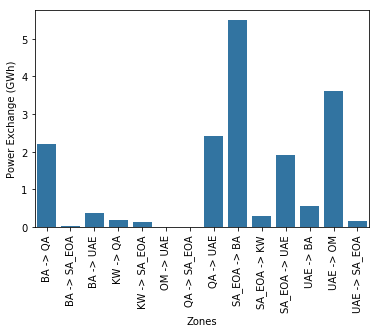

In [28]:
NewOutputFlow = results['PowerFlow'].copy()
columns = []
for i,column in enumerate(NewOutputFlow):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()
#pd.DataFrame((GCCFlows.sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

df = (GCCFlows/1000).T.sort_index().sum(axis=1).reset_index()
df.columns = [ 'Zones', 'Power Exchange (GWh)']
aa = sns.barplot(data=df, x='Zones', y='Power Exchange (GWh)',color='#1f77b4')

for item in aa.get_xticklabels():
    item.set_rotation(90)
#Summer
#pd.DataFrame((GCCFlows['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

#Winter
#pd.DataFrame(((GCCFlows['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum()+GCCFlows['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum())/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

#A = pd.DataFrame((GCCFlows.sum()),columns=['Power traded'])
#print A
#print A.sum()


               Power traded
BA -> SA_EOA      18.844995
SA_EOA -> BA    5491.026937
KW -> SA_EOA     126.495428
SA_EOA -> KW     287.527391
UAE -> SA_EOA    158.132537
SA_EOA -> UAE   1910.640753
QA -> SA_EOA       8.211338
BA -> QA        2204.739864
QA -> UAE       2424.957548
KW -> QA         202.421993
UAE -> BA        564.654526
BA -> UAE        362.732976
OM -> UAE          0.108466
UAE -> OM       3613.705163
Power traded    17374.199915
dtype: float64


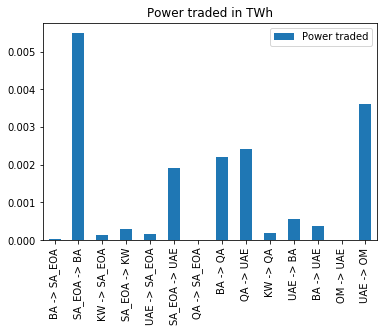

In [29]:
NewOutputFlow = results['PowerFlow'].copy()
columns = []
for i,column in enumerate(NewOutputFlow):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()
pd.DataFrame((GCCFlows.sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')
#Summer
#pd.DataFrame((GCCFlows['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

#Winter
#pd.DataFrame(((GCCFlows['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum()+GCCFlows['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum())/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

A = pd.DataFrame((GCCFlows.sum()),columns=['Power traded'])
print (A)
print (A.sum())


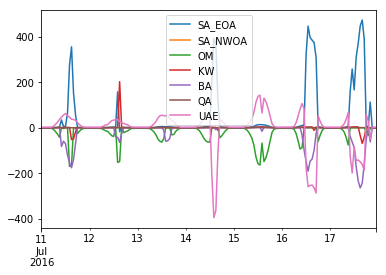

In [30]:
#Net Exports (for GCC countries and EOA) taking into account that exports of EOA does not include exports to other KSA regions 

NewOutputFlow = results['PowerFlow'].copy()
OriginalColumns = []
reverseindex = []
for j,column in enumerate(NewOutputFlow):
    A = column.split(' -> ')
    OriginalColumns.append(A)
    B = list(reversed(A))
    if B in OriginalColumns:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow.iloc[:,D] = NewOutputFlow.iloc[:,D] - NewOutputFlow.iloc[:,j]
NewOutputFlow = NewOutputFlow.drop(NewOutputFlow.columns[reverseindex], axis=1).copy()

columns = []
for i,column in enumerate(NewOutputFlow):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()

NetExports=pd.DataFrame(columns=inputs['config']['zones'], index=NewOutputFlow.index)
for zone in inputs['config']['zones']:
    for column in GCCFlows:
        [from_node, to_node] = column.split(' -> ')
        if (from_node == zone):
            tmp = pd.Series(GCCFlows[column], index=NetExports.index)
            if NetExports.loc[NetExports.index, zone].isnull().values.any():
                NetExports.loc[NetExports.index, zone] = np.array(tmp)
            else:
                NetExports.loc[NetExports.index, zone] += np.array(tmp)
    for column in GCCFlows:
        [from_node, to_node] = column.split(' -> ')
        if (to_node == zone):
            tmp = pd.Series(GCCFlows[column], index=NetExports.index)
            if NetExports.loc[NetExports.index, zone].isnull().values.any():
                NetExports.loc[NetExports.index, zone] = np.array(tmp)*(-1)
            else:
                NetExports.loc[NetExports.index, zone] += np.array(tmp)*(-1)
                
NetExports.drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'], axis=1).plot()

Text(0.5, 1.0, 'Net Power Exports (GWh) (Int)')

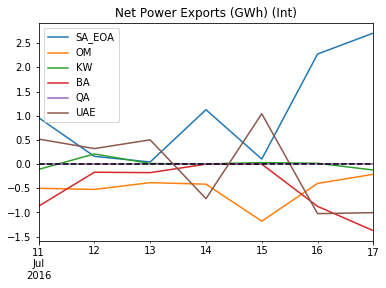

In [31]:
#Net Exports (for GCC countries and EOA) taking into account that exports of EOA does not include exports to other KSA regions 

NewOutputFlow = results['PowerFlow'].copy()
OriginalColumns = []
reverseindex = []
for j,column in enumerate(NewOutputFlow):
    A = column.split(' -> ')
    OriginalColumns.append(A)
    B = list(reversed(A))
    if B in OriginalColumns:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow.iloc[:,D] = NewOutputFlow.iloc[:,D] - NewOutputFlow.iloc[:,j]
NewOutputFlow = NewOutputFlow.drop(NewOutputFlow.columns[reverseindex], axis=1).copy()

columns = []
for i,column in enumerate(NewOutputFlow):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()

NetExports=pd.DataFrame(columns=inputs['config']['zones'], index=NewOutputFlow.index)
for zone in inputs['config']['zones']:
    for column in GCCFlows:
        [from_node, to_node] = column.split(' -> ')
        if (from_node == zone):
            tmp = pd.Series(GCCFlows[column], index=NetExports.index)
            if NetExports.loc[NetExports.index, zone].isnull().values.any():
                NetExports.loc[NetExports.index, zone] = np.array(tmp)
            else:
                NetExports.loc[NetExports.index, zone] += np.array(tmp)
    for column in GCCFlows:
        [from_node, to_node] = column.split(' -> ')
        if (to_node == zone):
            tmp = pd.Series(GCCFlows[column], index=NetExports.index)
            if NetExports.loc[NetExports.index, zone].isnull().values.any():
                NetExports.loc[NetExports.index, zone] = np.array(tmp)*(-1)
            else:
                NetExports.loc[NetExports.index, zone] += np.array(tmp)*(-1)


#(NetExports.drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'], axis=1).sum())/1000000

A = ((NetExports.drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA','SA_NWOA'], axis=1))/1000)
A.resample('D').sum().plot().axhline(0, ls='--',color='k')
plt.title("Net Power Exports (GWh) (Int)")

#df = (NetExports.drop(['SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'], axis=1)/1000000).T.sort_index().sum(axis=1).reset_index()

#df.columns = [ 'Zone', 'Net Power Exports (TWh)']
#sns.barplot(data=df, x='Zone', y='Net Power Exports (TWh)',color='#1f77b4').axhline(0, ls='--',color='k')
#plt.title("Int")



In [32]:
#NewOutputFlow = results['PowerFlow'].copy()
#OriginalColumns = []
#reverseindex = []
#for j,column in enumerate(NewOutputFlow):
#    A = column.split(' -> ')
#    OriginalColumns.append(A)
#    B = list(reversed(A))
#    if B in OriginalColumns:
#        reverseindex.append(j)
#        D = [i for i, C in enumerate(OriginalColumns) if C==B]
#        D = int(''.join(map(str,D)))
#        NewOutputFlow.iloc[:,D] = NewOutputFlow.iloc[:,D] - NewOutputFlow.iloc[:,j]
#NewOutputFlow = NewOutputFlow.drop(NewOutputFlow.columns[reverseindex], axis=1).copy()
#
#columns = []
#for i,column in enumerate(NewOutputFlow):
#    [from_node, to_node] = column.split('->')
#    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
#        columns.append(i)
#GCCFlows = NewOutputFlow.drop(NewOutputFlow.columns[columns], axis=1).copy()
#pd.DataFrame((GCCFlows.sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')
#
#A = pd.DataFrame((GCCFlows.sum()),columns=['Power traded'])
#print A
#print A.sum()
#Summer
#pd.DataFrame((GCCFlows['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

#Winter
#pd.DataFrame(((GCCFlows['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum()+GCCFlows['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum())/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')



## -- Power exports/imports

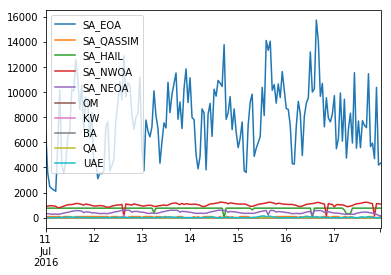

In [33]:
results['TotalExportedPower'].drop(['SA_RIYADH','SA_SOA','SA_WOA'], axis=1).plot()
#   ,'SA_HAIL','SA_NEOA','SA_QASSIM'

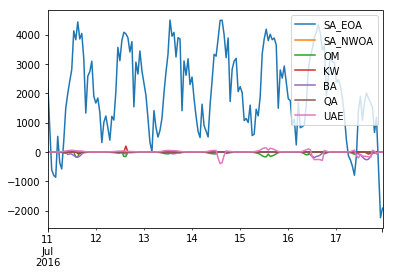

In [34]:
#Net Exports (for GCC countries and EOA) NOT taking into account that exports of EOA does not include exports to other KSA regions 

results['NetExportedPower'].drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'], axis=1).plot()


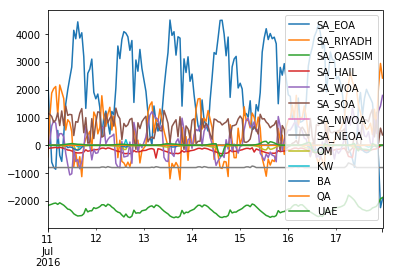

In [35]:
results['NetExportedPower'].plot()

## -- Node shadow price (marginal price)

In [36]:
results['NodeShadowPrice'].std()

SA_EOA       3.943621e+00
SA_RIYADH    3.943621e+00
SA_QASSIM    3.943597e+00
SA_HAIL      3.943597e+00
SA_WOA       3.943597e+00
SA_SOA       3.943597e+00
SA_NWOA      4.852114e-15
SA_NEOA      3.951626e+00
OM           4.598184e+00
KW           8.991707e+00
BA           1.300437e+01
QA           3.563335e-14
UAE          1.327663e+01
dtype: float64

Text(0.5, 1.0, 'Marginal nodal prices ($/MWh)')

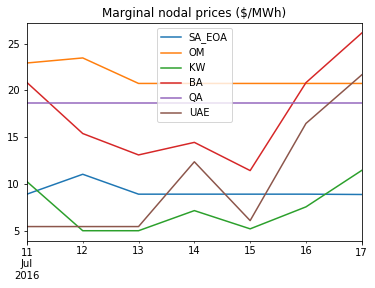

In [37]:
results['NodeShadowPrice'].resample('D',how='mean').drop([ 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).plot()
plt.title('Marginal nodal prices ($/MWh)')


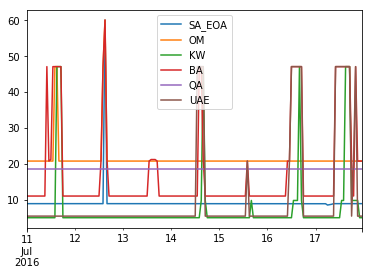

In [38]:
results['NodeShadowPrice'].drop(columns=[ 'SA_RIYADH','SA_QASSIM', 'SA_HAIL',  'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA' ]).plot()


## -- Power plants indicators

In [39]:
PPindicators = post.get_indicators_powerplant(inputs,results)
PPindicators.head(5)

,Nunits,PowerCapacity,Zone,Technology,Fuel,startups,CF,Generation
"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] - SA_EOA - STUR - GAS -",12,573.000000,SA_EOA,STUR,GAS,0,1.000000,1.155168e+06
"[12, 13, 14, 15, 16, ... _EOA - GTUR - GAS -",81,70.372260,SA_EOA,GTUR,GAS,0,0.000000,0.000000e+00
"[30, 31, 32, 33, 34, 35] - SA_EOA - COMC - GAS -",6,665.000000,SA_EOA,COMC,GAS,0,1.000000,6.703200e+05
"[58, 59, 60, 61, 62, 63] - SA_EOA - GTUR - DSL -",6,20.266667,SA_EOA,GTUR,DSL,0,0.000000,0.000000e+00
"[105, 106, 107, 108, ... _EOA - ICEN - GAS -",8,1462.500000,SA_EOA,ICEN,GAS,3,0.720626,1.416462e+06


## --Fuel power per zone

In [40]:
fuels = PPindicators.Fuel.unique()
countries = PPindicators.Zone.unique()

GenPerCountry = pd.DataFrame(index=countries, columns=fuels)
# First make sure that all fuels are present. If not, initialize an empty series
for f in ['NUC', 'LFG', 'DSL', 'MSW', 'GAS', 'OIL', 'WST', 'SUN', 'WIN', 'FlowIn', 'HFO']:
    if f not in GenPerCountry:
        GenPerCountry[f] = 0
for c in countries:
    for f in fuels:
        tmp = PPindicators[(PPindicators.Fuel == f) & (PPindicators.Zone == c)]
        GenPerCountry.loc[c, f] = tmp.Generation.sum()
    NetImports = post.get_imports(results['PowerFlow'], c)
    if NetImports > 0:
        GenPerCountry.loc[c, 'FlowIn'] = NetImports
GenPerCountry = GenPerCountry.copy()
A = GenPerCountry.drop(['BA','KW','OM','QA','UAE']).sum()
A.name = 'KSA'
GenPerCountry = GenPerCountry.append(A, ignore_index=False)
GenPerCountry.loc['KSA', 'FlowIn'] = 'TBD'
GenPerCountry

,GAS,DSL,SUN,OIL,HFO,LFG,MSW,WIN,NUC,WST,FlowIn
SA_EOA,3.24195e+06,0,266.102,0,0.0,0,0.0,0,0.0,0.0,0
SA_HAIL,0,0,0,126036,0.0,0,0.0,0,0.0,0.0,31903
SA_NEOA,0,50968.6,0,21227.3,0.0,0,0.0,0,0.0,0.0,133388
SA_NWOA,0,10785.6,27.8773,164956,0.0,0,0.0,0,0.0,0.0,0
SA_QASSIM,0,0,0,15339.8,0.0,0,0.0,0,0.0,0.0,389049
SA_RIYADH,839882,0,115.429,1.3923e+06,0.0,0,0.0,0,0.0,0.0,0
SA_SOA,261238,516339,12.6715,189343,0.0,0,0.0,0,0.0,0.0,0
SA_WOA,325338,0,62.8507,421028,1623888.0,0,0.0,0,0.0,0.0,0
BA,458964,0,76.0291,0,0.0,0,0.0,0,0.0,0.0,3469.36
KW,1.92711e+06,0,143.611,8397.67,0.0,0,0.0,0,0.0,0.0,0


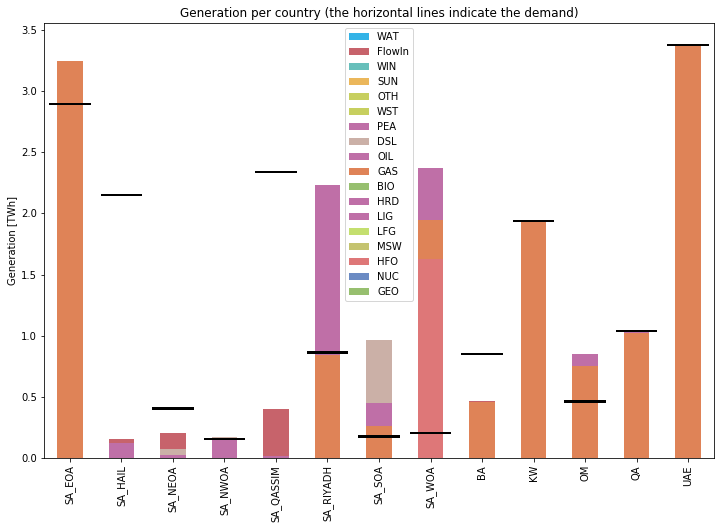

In [49]:
#Plots the generation for each country, disaggregated by fuel type
ax = ds.plot_energy_zone_fuel(inputs,results,PPindicators)

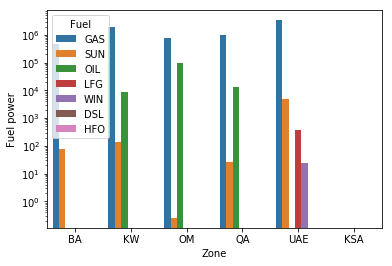

In [56]:
df = results['NodeFuelPower'].T.sort_index().sum(axis=1)
KSA = df['SA_EOA']+df['SA_HAIL']+df['SA_NEOA']+df['SA_NWOA']+df['SA_QASSIM']+df['SA_RIYADH']+df['SA_SOA']+df['SA_WOA']
df['KSA','DSL'] = KSA['DSL']
df['KSA','GAS'] = KSA['GAS']
df['KSA','HFO'] = KSA['HFO']
df['KSA','OIL'] = KSA['OIL']
df['KSA','SUN'] = KSA['SUN']
#df['KSA','LFG'] = KSA['LFG']
#df['KSA','MSW'] = KSA['MSW']
#df['KSA','WIN'] = KSA['WIN']

df = df.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])
df = df.reset_index()
df.columns = ['Zone', 'Fuel', 'Fuel power']
sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel').set_yscale('log')

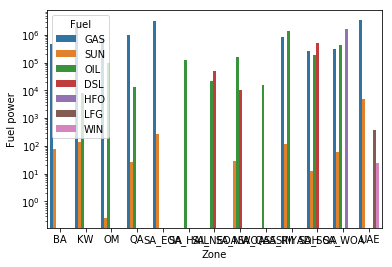

In [53]:
df = results['NodeFuelPower'].T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel power']
sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel').set_yscale('log')


## -- Fuel consumption

## -- Transmission congestion of GCCIA interconnector

In [42]:
(results['LineCongestion'].sum()/len(datain['Demand']['DA']))*100


SA_RIYADH -> SA_QASSIM    10.119048
SA_HAIL -> SA_NEOA        85.119048
dtype: float64

In [51]:
(results['LineCongestion_KSA_GCC'].sum()/len(datain['Demand']['DA']))*100

Series([], dtype: float64)

In [50]:
columns=['KSA - GCC','KW - GCC','BA - GCC','QA - GCC','UAE - GCC','UAE - OM','Ghunan - Salwa','Ghunan - Alfadhili']
A_list = []
A_list.append((results['LineCongestion_KSA_GCC'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_KW_GCC'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_BA_GCC'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_QA_GCC'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_UAE_GCC'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_OM_GCC'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_Ghunan_Salwa'].sum()/len(datain['Demand']['DA']))*100)
A_list.append((results['LineCongestion_Ghunan_Alfadhili'].sum()/len(datain['Demand']['DA']))*100)

A = pd.DataFrame([A_list],columns=columns).T.reset_index()
A.columns = ['Line', '% Utilization']
aa = sns.barplot(data=A, x='Line', y='% Utilization',color='#1f77b4')
for item in aa.get_xticklabels():
    item.set_rotation(90)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

## -- Government spending on fuel subsidy

In [45]:
KSA_DSL =(73.88409558-2.284372129)
KSA_GAS =(30.82197619-2.55713298)
KSA_HFO =(52.60874918-1.466089575)
KSA_OIL =(65.66717494-2.488942768)

OM_DSL =(73.88409558-0.67)
OM_GAS =(30.82197619-3)
OM_HFO =(52.60874918-0.43)
OM_OIL =(65.66717494-0.73)

KW_DSL =(73.88409558-0.67)
KW_GAS =(30.82197619-1.5)
KW_HFO =(52.60874918-0.43)
KW_OIL =(65.66717494-0.73)

UAE_DSL =(73.88409558-0.67)
UAE_GAS =(30.82197619-0.75)
UAE_HFO =(52.60874918-0.43)
UAE_OIL =(65.66717494-0.73)

QA_DSL =(73.88409558-0.67)
QA_GAS =(30.82197619-0.75)
QA_HFO =(52.60874918-0.43)
QA_OIL =(65.66717494-0.73)

BA_DSL =(73.88409558-0.67)
BA_GAS =(30.82197619-2.5)
BA_HFO =(52.60874918-0.43)
BA_OIL =(65.66717494-0.73)


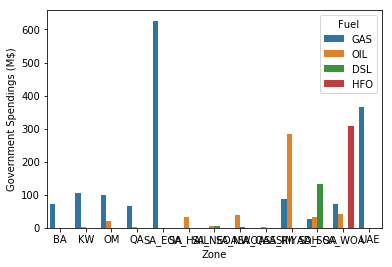

In [105]:
#results['NodeFuelConsumption']
df = results['NodeFuelConsumption'].T.sort_index()
df_masked = df[df.index.droplevel(0).isin(['HFO','OIL','GAS','DSL'])].sum(axis=1)

for zone in ['BA', 'KW', 'OM', 'QA', 'SA_EOA', 'SA_HAIL', 'SA_NEOA', 'SA_NWOA',
       'SA_QASSIM', 'SA_RIYADH', 'SA_SOA', 'SA_WOA', 'UAE']:
    for fuel in ['GAS', 'OIL', 'DSL', 'HFO']:
        try:
            df_masked[zone][fuel]
        except:
            df_masked.ix[(zone,fuel)] = 0

Index1=df_masked.index

list1=[BA_DSL,BA_GAS,BA_HFO,BA_OIL,KW_DSL,KW_GAS,KW_HFO,KW_OIL,OM_DSL, OM_GAS,OM_HFO,OM_OIL,
                QA_DSL, QA_GAS,QA_HFO,QA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,UAE_DSL, UAE_GAS,UAE_HFO,UAE_OIL]
'''
df_masked.mul([BA_DSL, BA_GAS,BA_HFO,BA_OIL,KW_DSL,KW_GAS,KW_HFO,KW_OIL,OM_DSL, OM_GAS,OM_HFO,OM_OIL,
                QA_DSL, QA_GAS,QA_HFO,QA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,UAE_DSL, UAE_GAS,UAE_HFO,UAE_OIL], axis=0)
'''
#np.array(df_masked)*np.array(list1)
#np.multiply(np.array(df_masked), np.array(list1))
df_masked=pd.DataFrame((1/1000000)*np.multiply(np.array(df_masked), np.array(list1)),index=Index1)
#df_masked=pd.DataFrame(np.multiply(np.array(df_masked), np.array(list1)))
#df_masked.columns = ['Zone', 'Fuel', 'Government spendings ($)']
#df.columns = ['Zone', 'Fuel', 'Government spendings ($)']
#sns.barplot(data=df_masked, x='Zone', y='Government spendings ($)', hue='Fuel')

df = df_masked.reset_index()
df.columns = ['Zone', 'Fuel', 'Government Spendings (M$)']
sns.barplot(data=df, x='Zone', y='Government Spendings (M$)', hue='Fuel')